# Pandorable pandas

pandas is an extremely powerful and extremely useful library for doing data analysis in Python. In this tutorial, we'll emphasize writing code that is both clean and high-performance.

## Contents

- [Introduction](Introduction.ipynb)
- [Alignment](Alignment.ipynb)
- [Tidy Data](Tidy.ipynb)
- [Performance](Performance.ipynb)

## Preview

As a taste of what we'll learn today, let's read in some data on flights in the New York region. Each row is a single flight. We have columns for the date, airline, plance, origin and destination, delay, etc.

In [1]:
import pandas as pd
import seaborn as sns

flights = pd.read_csv("data/ny-flights.csv.gz", parse_dates=["fl_date", "dep", "arr"])
flights

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


With pandas we can quickly load data, select subsets, and transform it for downstream tasks like modelling or visualization. For example we'll we can answer the question "How many planes are usually taking off?" by with a small chain of methods that go from raw data to visual.

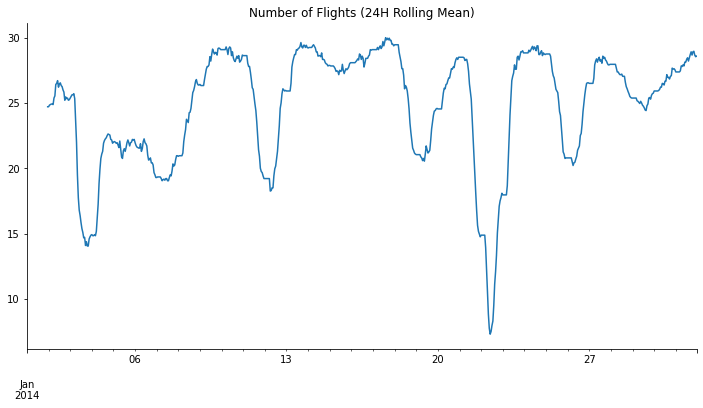

In [5]:
(flights['dep']
    .value_counts()
    .resample('H')
    .sum()
    .rolling(24).mean()
    .plot(figsize=(12, 6),
          title="Number of Flights (24H Rolling Mean)"))
sns.despine()

Combined with libraries like [seaborn](http://seaborn.pydata.org), we can quickly visualize the number of flights per carrier.

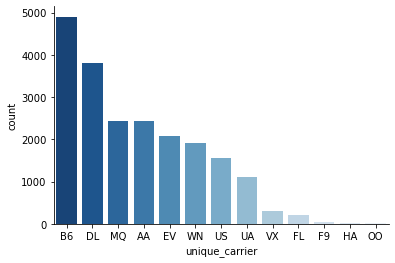

In [8]:
sns.countplot(
    x='unique_carrier',
    data=flights,
    order=flights['unique_carrier'].value_counts().index,
    palette='Blues_r'
)
sns.despine()

We can select subsets of the data (those with a delay between 1 and 500 minutes) and visualize the joint distribution of arrival and departure delays.

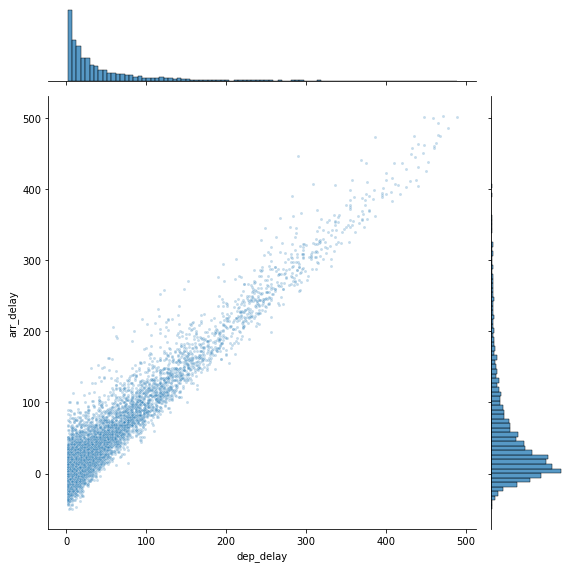

In [9]:
mask = (flights["dep_delay"] > 1) & (flights["dep_delay"] < 500)

sns.jointplot(x='dep_delay',
              y='arr_delay',
              data=flights[mask],
              alpha=.25, marker='.', height=8);

## A familiar story

Part of writing pandorable code is readability. We want your data analysis pipelines to flow clearly from step to step. To illustrate this, let's retell a story from [Jeff Allen's](http://trestletech.com/wp-content/uploads/2015/07/dplyr.pdf) presentation on dplyr:

```python
tumble_after(
    broke(
        fell_down(
            fetch(
                went_up(jack_jill, "hill"),
                "water"),
            jack),
        "crown"),
    "jill"
)
```

You probably recognized this as the story of *Jack and Jill*. But it may not have been immediately obvious, when told "inside-out" like that. Data analysis pipelines take raw data and transform them somehow into a useful result by applying a series of functions.

In English, we read left-to-right, top-to-bottom; not inside out. Let's rewrite the story, using *method chaining*.

```python
story = (
    jack_jill
        .went_up("hill")
        .fetch("water")
        .fell_down("jack")
        .broke("crown")
        .tumble_after("jill")
)
```

This story, told two ways, illustrates a couple interesting points:

1. Functions / methods are typically *verbs* (`went_up`, `fetch`, etc.).
2. Function arguments are typically *nouns* (`jack`, `"crown"`, etc.).
3. For readability, it's helpful to have the *structure of your code* reflect the data flow through the pipeline.


We'll see a lot of method chaining today. It's best used in moderation.

Next, we move onto [Alignment](Alignment.ipynb).